In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data_2019 = pd.read_csv("../data/better_qb_2019.csv")
data_2020 = pd.read_csv("../data/better_qb_2020.csv")
data_2021 = pd.read_csv("../data/better_qb_2021.csv")

In [4]:
data_2019['year'] = 2019
data_2020['year'] = 2020
data_2021['year'] = 2021

In [5]:
df = pd.concat([data_2019,data_2020,data_2021])

In [6]:
df.head()

,spread_favorite,team_favorite_id,schedule_week,team_home,team_away,score_away,score_home,home_win,home_favorite,mov,cover,home_qb,away_qb,qb_getting_points,did_they_cover,year
0,-3.0,CHI,1,CHI,GB,10,3,False,True,7,GB,0.070,0.152,True,True,2019
1,-5.5,CLE,1,CLE,TEN,43,13,False,True,30,TEN,0.089,0.093,True,True,2019
2,-7.0,DAL,1,DAL,NYG,17,35,True,True,18,DAL,0.104,0.079,False,True,2019
3,-3.5,KC,1,JAX,KC,40,26,False,False,14,KC,0.062,0.202,False,True,2019
4,-7.0,BAL,1,MIA,BAL,59,10,False,False,49,BAL,0.066,0.032,True,False,2019


In [7]:
df.groupby('did_they_cover').count()/len(df)

,spread_favorite,team_favorite_id,schedule_week,team_home,team_away,score_away,score_home,home_win,home_favorite,mov,cover,home_qb,away_qb,qb_getting_points,year
did_they_cover,,,,,,,,,,,,,,,
False,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48
True,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52


In [8]:
df[df.qb_getting_points == True].groupby("did_they_cover").count()/111

,spread_favorite,team_favorite_id,schedule_week,team_home,team_away,score_away,score_home,home_win,home_favorite,mov,cover,home_qb,away_qb,qb_getting_points,year
did_they_cover,,,,,,,,,,,,,,,
False,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342,0.342342
True,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658,0.657658


<Figure size 2016x720 with 0 Axes>

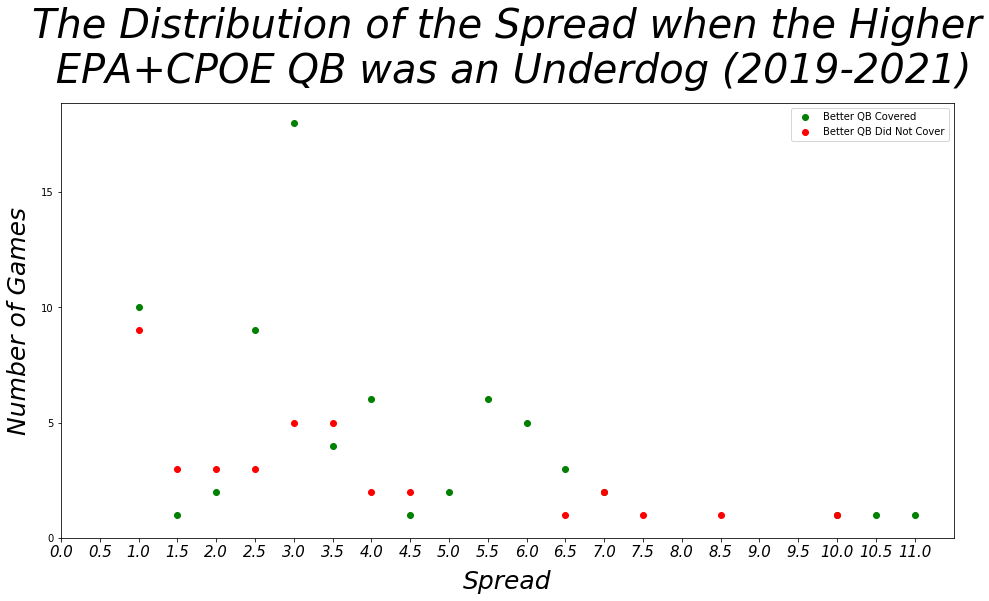

In [13]:
plt.figure(figsize = (28,10))
data1 = df[df.qb_getting_points == True][['spread_favorite', 'did_they_cover']]
data1 = data1[data1.spread_favorite >-17]
data1.reset_index(inplace= True)
data2 = data1[data1['did_they_cover']==True]['spread_favorite'].value_counts()
data3 = data1[data1['did_they_cover']==False]['spread_favorite'].value_counts()
spread = list(abs(data2.index))
count = list(data2.values)
spread1 = list(abs(data3.index))
count1 = list(data3.values)
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
plt.scatter(spread, count,c= 'green')
plt.scatter(spread1, count1, c= 'red')
plt.xticks(style = 'italic', size = 15)
plt.xticks(np.arange(0,11.5, .5))
plt.yticks(np.arange(0,18,5))
ax.legend(['Better QB Covered', 'Better QB Did Not Cover'])
plt.title('The Distribution of the Spread when the Higher\n EPA+CPOE QB was an Underdog (2019-2021)', size = 40, pad = 20, loc = 'center', style = 'oblique')
plt.xlabel("Spread", size = 25, labelpad = 10, style = 'italic')
plt.ylabel("Number of Games", size = 25, labelpad = 10, style = 'italic')
plt.savefig('../graphs/Dist_underdogQB.png', bbox_inches = 'tight')

In [10]:
data1[abs(data1.spread_favorite) >= 3]['did_they_cover'].value_counts()/71

True     0.704225
False    0.281690
Name: did_they_cover, dtype: float64

<Figure size 2016x720 with 0 Axes>

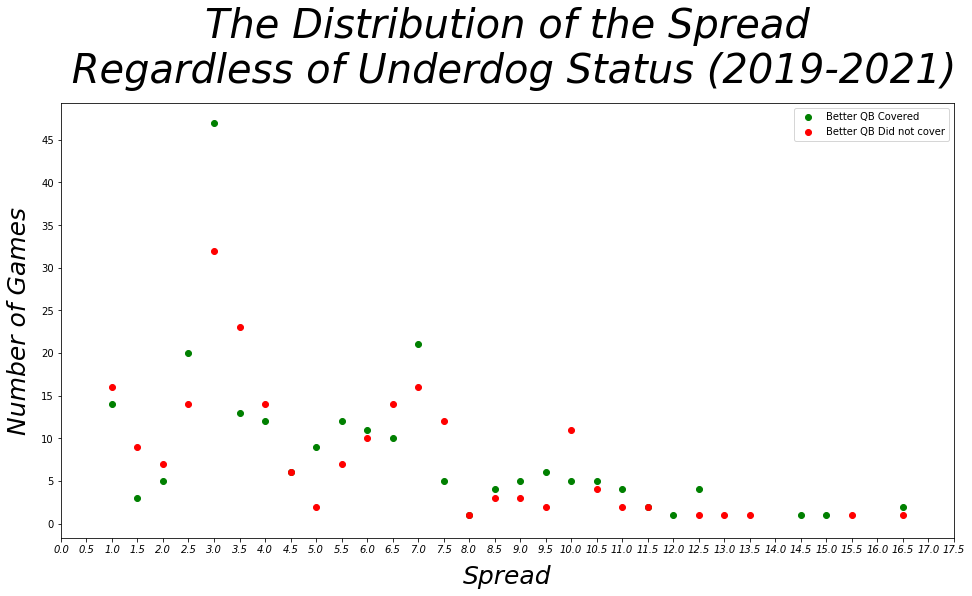

In [14]:
plt.figure(figsize = (28,10))
data1 = df[['spread_favorite', 'did_they_cover']]
data1 = data1[data1.spread_favorite >-17]
data1.reset_index(inplace= True)
data2 = data1[data1['did_they_cover']==True]['spread_favorite'].value_counts()
data3 = data1[data1['did_they_cover']==False]['spread_favorite'].value_counts()
spread = list(abs(data2.index))
count = list(data2.values)
spread1 = list(abs(data3.index))
count1 = list(data3.values)
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
plt.scatter(spread, count,c= 'green')
plt.scatter(spread1, count1, c= 'red')
plt.xticks(style = 'italic', size = 10)
plt.xticks(np.arange(0,18, .5))
plt.yticks(np.arange(0,50,5))
ax.legend(['Better QB Covered', 'Better QB Did not cover'])
plt.title('The Distribution of the Spread\n Regardless of Underdog Status (2019-2021)', size = 40, pad = 20, loc = 'center', style = 'oblique')
plt.xlabel("Spread", size = 25, labelpad = 10, style = 'italic')
plt.ylabel("Number of Games", size = 25, labelpad = 10, style = 'italic')
plt.savefig('../graphs/Dist_allQB.png', bbox_inches = 'tight')

In [12]:
data1[data1.spread_favorite == -3]['did_they_cover'].value_counts()/79

True     0.594937
False    0.405063
Name: did_they_cover, dtype: float64